# Proyek Analisis Data: [Bike Sharing Dataset]

> Add blockquote


- **Nama:** [Luthfiyyah Wahyu Nurfarida]
- **Email:** [m283b4kx2311@bangkit.academy]
- **ID Dicoding:** [m283b4kx2311]

## Menentukan Pertanyaan Bisnis

Bahasa Indonesia :
- apakah perbedaan musim berpengaruh pada tren penyewaan sepeda?
- apa pengaruh holiday pada banyaknya penyewa sepeda?

english :
- Is there a relationship between season and the trend of daily bicycle renting?
- What is the effect of holidays on the number of bicycle renters?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [ ]:
df_hour = pd.read_csv("https://drive.google.com/uc?id=1L9OyIKdgGVPpThq55Z-54BFpOfurkNVu&export=download")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day = pd.read_csv("https://drive.google.com/uc?id=1LloLN-1f6CXvF4Qpp7Wgy4a6gO9KZtgu&export=download")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

menilai data dari tabel df_hour

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


mengecek dan menghitung jumlah nilai NaN (Not a Number) atau missing values dalam setiap kolom


In [ ]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


mengecek nilai unik yang terdapat dalam tabel df_hour

In [ ]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


Cek duplikasi data df_hour

In [ ]:
print("duplicate :", df_hour.duplicated().sum())

duplicate : 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menilai data dari tabel df_day

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
print("duplicate :", df_day.duplicated().sum())

duplicate : 0


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- dataset df_hour dan df_day sudah tidak memiliki duplikat atau data yang redudan.
- tidak ada nilai NaN (Not a Number) atau missing values dalam setiap kolom baik pada tabel df_hour maupun df_day

### Cleaning Data

Cek duplikasi data

In [ ]:
print("duplicate pada df_hour :", df_hour.duplicated().sum())
print("duplicate pada df_day:", df_day.duplicated().sum())

duplicate pada df_hour : 0
duplicate pada df_day: 0


karena hasil pengecekan duplikasi data pada tabel df_hour dan df_days menyatakan bahwa kedua tabel sudah bersih, maka tabel sudah tidak perlu lagi dibersihkan dari data redudan

**Cek apakah ada data yang tidak sesuai atau invalid**

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cek Missing Value pada masing-masing tabel


In [ ]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


karena tidak ada Missing Value pada tabel df_hour dan df_days, maka kedua tabel sudah bersih dan tabel sudah tidak perlu lagi dibersihkan dari missing value nya

cek pada kolom yang sekiranya bisa memiliki invalid value

In [ ]:
df_hour.season.value_counts().sort_index()

,count
season,
Fall,4496
Spring,4242
Summer,4409
Winter,4232


pada kolom season atau musim, dapat dipastikan aman karena sudah terdapat 4 musim dengan keterangan 1:springer, 2:summer, 3:fall, 4:winter

In [ ]:
df_hour.mnth.value_counts().sort_index()

,count
mnth,
1,1429
2,1341
3,1473
4,1437
5,1488
6,1440
7,1488
8,1475
9,1437


Pada kolom bulan juga sudah benar terdapat 12 bulan.

In [ ]:
df_hour.weathersit.value_counts().sort_index()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


pada kolom weathersit atau cuaca, dapat dipastikan aman karena sudah terdapat 4 kategori cuaca dengan keterangan :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


**Insight:**
- data pada tabel df_hour dan df_day sudah tidak ada yang mengandung missing values dan invalid values

## Exploratory Data Analysis (EDA)

### Explore df_hour

In [ ]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9418,9419,2012-02-02,1,1,2,8,0,4,1,3,0.40,0.4091,0.87,0.0000,9,436,445
15610,15611,2012-10-17,4,1,10,15,0,3,1,2,0.58,0.5455,0.43,0.2239,62,239,301
7595,7596,2011-11-18,4,0,11,2,0,5,1,1,0.24,0.2273,0.44,0.2239,2,8,10
3338,3339,2011-05-24,2,0,5,0,0,2,1,2,0.60,0.5152,0.94,0.1940,12,23,35
15235,15236,2012-10-02,4,1,10,0,0,2,1,2,0.56,0.5303,0.73,0.0000,1,30,31


In [ ]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Mengubah value season dari angka menjadi nama untuk memudahkan proses analisis.

In [ ]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df_hour['season'] = df_hour['season'].replace(season_mapping)
print(df_hour.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01  Spring   0     1   0        0        6           0   
1        2  2011-01-01  Spring   0     1   1        0        6           0   
2        3  2011-01-01  Spring   0     1   2        0        6           0   
3        4  2011-01-01  Spring   0     1   3        0        6           0   
4        5  2011-01-01  Spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


Gabungkan kolom musim pada tabel peminjam hourly, dengan banyaknya peminjam sepeda untuk mengetahui banyaknya penyewa pada musim tertentu

In [ ]:
df_hour.groupby(by="season")['cnt'].sum().sort_index()


,cnt
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


Buat histogram untuk mengetahui bentuk data

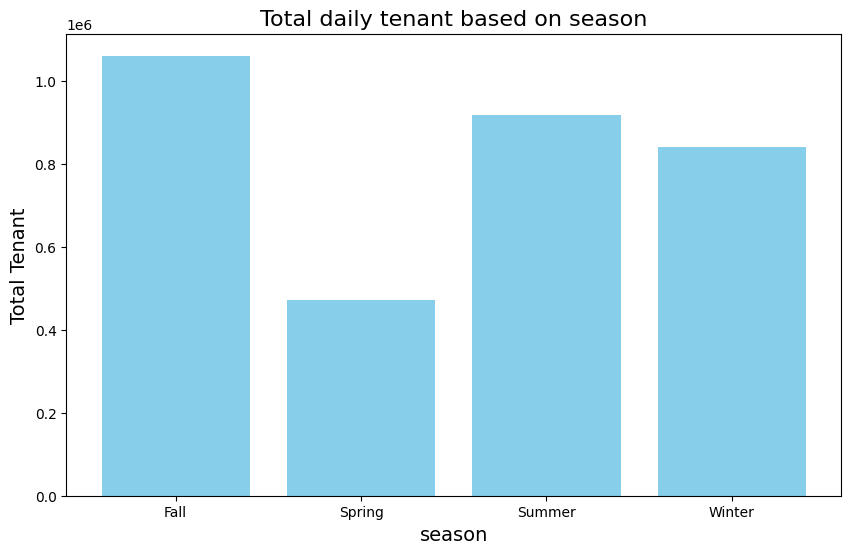

In [ ]:
hour_season_counts = df_hour.groupby(by="season")['cnt'].sum().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hour_season_counts.index, hour_season_counts.values, color='skyblue')

plt.title('Total daily tenant based on season', fontsize=16)
plt.xlabel('season', fontsize=14)
plt.ylabel('Total Tenant', fontsize=14)
plt.xticks(hour_season_counts.index)
plt.show()

Lihat banyaknya peminjam sepeda based on hour, berdasarkan event holiday

In [ ]:
df_hour.groupby(by="holiday")[['casual', 'registered','cnt']].sum().sort_index()

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [ ]:
df_hour.groupby(by="mnth")[['casual', 'registered','cnt']].sum().sort_index()

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


In [ ]:
hour_monthly_cnt = df_hour.groupby(by="mnth")[['casual', 'registered','cnt']].sum().sort_index()


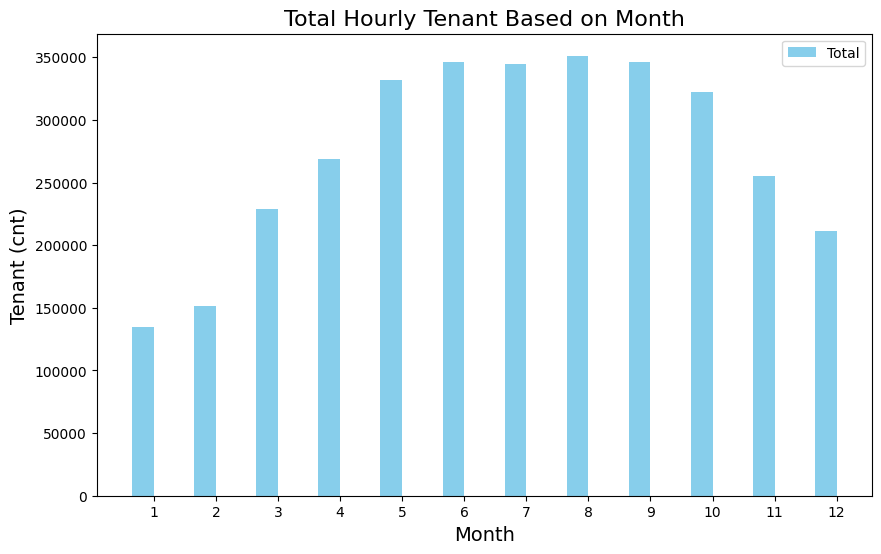

In [ ]:
plt.figure(figsize=(10, 6))

months = hour_monthly_cnt.index
bar_width = 0.35

index = np.arange(len(months))
cnt_bar = plt.bar(index - bar_width/2, hour_monthly_cnt['cnt'], bar_width, label='Total', color='skyblue')

plt.title('Total Hourly Tenant Based on Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Tenant (cnt)', fontsize=14)

plt.xticks(index, months)

plt.legend()

plt.show()

### Explore df_day

In [ ]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
285,286,2011-10-13,4,0,10,0,4,1,2,0.589167,0.551804,0.896667,0.141787,290,2623,2913
415,416,2012-02-20,1,1,2,1,1,0,1,0.280000,0.273391,0.507826,0.229083,502,2627,3129
151,152,2011-06-01,2,0,6,0,3,1,2,0.764167,0.720967,0.677083,0.207092,513,3461,3974
613,614,2012-09-05,3,1,9,0,3,1,1,0.736667,0.708983,0.741250,0.187808,832,6280,7112
344,345,2011-12-11,4,0,12,0,0,0,1,0.220833,0.253154,0.490000,0.066542,377,2366,2743


In [ ]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df_day['season'] = df_day['season'].replace(season_mapping)
print(df_day.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01  Spring   0     1        0        6           0   
1        2  2011-01-02  Spring   0     1        0        0           0   
2        3  2011-01-03  Spring   0     1        0        1           1   
3        4  2011-01-04  Spring   0     1        0        2           1   
4        5  2011-01-05  Spring   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Gabungkan kolom cuaca pada tabel peminjam harian dengan banyaknya peminjam sepeda untuk mengetahui korelasinya

In [ ]:
df_day.groupby(by="season")['cnt'].sum().sort_index()


,cnt
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


In [ ]:
day_season_counts = df_day.groupby(by="season")['cnt'].sum().sort_index()

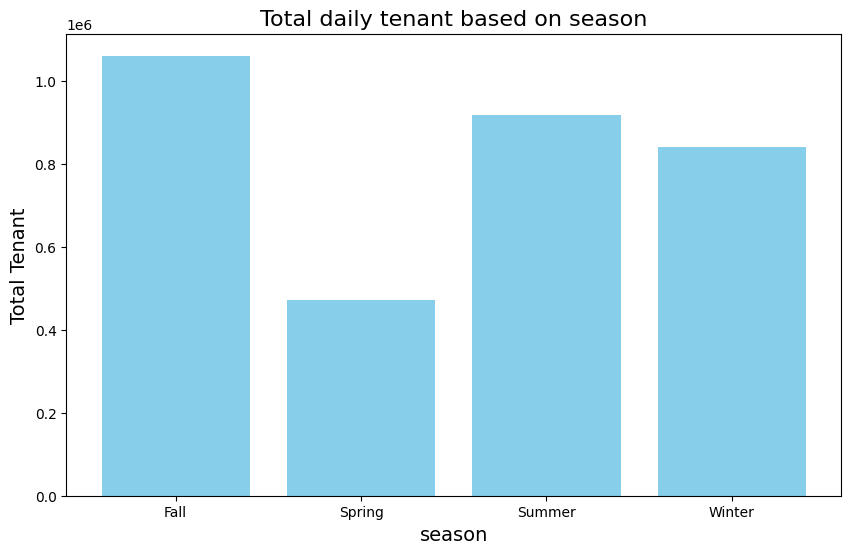

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(day_season_counts.index, day_season_counts.values, color='skyblue')

plt.title('Total daily tenant based on season', fontsize=16)
plt.xlabel('season', fontsize=14)
plt.ylabel('Total Tenant', fontsize=14)
plt.xticks(day_season_counts.index)
plt.show()

Lihat banyaknya peminjam sepeda harian berdasarkan event hari (holiday dan working day)

In [ ]:
df_day.groupby(by="holiday")[['casual', 'registered']].sum().sort_index()


,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


In [ ]:
df_day.groupby(by="mnth")[['casual', 'registered','cnt']].sum().sort_index()


,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


In [ ]:
day_monthly_cnt = df_day.groupby(by="mnth")[['casual', 'registered','cnt']].sum().sort_index()

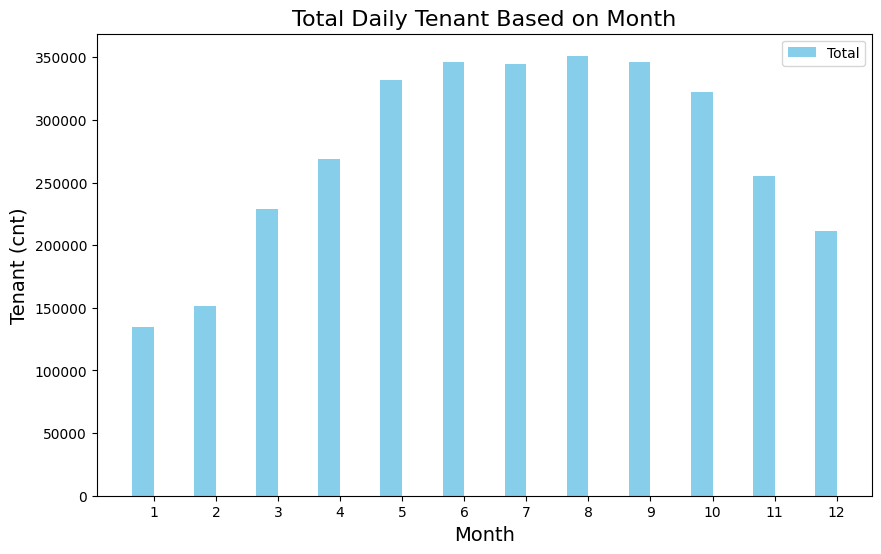

In [ ]:
plt.figure(figsize=(10, 6))

months = day_monthly_cnt.index
bar_width = 0.35

index = np.arange(len(months))
cnt_bar = plt.bar(index - bar_width/2, day_monthly_cnt['cnt'], bar_width, label='Total', color='skyblue')

plt.title('Total Daily Tenant Based on Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Tenant (cnt)', fontsize=14)

plt.xticks(index, months)

plt.legend()

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: apakah perbedaan musim berpengaruh pada tren penyewaan sepeda?

Kedua tabel akan di merge untuk menghasilkan satu tabel gabungan yang berisi rekap dari data penyewa sepeda baik peminjaman secara harian maupun per-jam.

data di-merge pada kolom date atau tanggal agar menghasilkan rekap pemesanan berdasarkan hari dimana sepeda tersebut disewa.

In [ ]:
df_hour_agg = df_hour.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

df_combined = pd.merge(df_day, df_hour_agg, on='dteday', suffixes=('_day', '_hour'))
print(df_combined.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01  Spring   0     1        0        6           0   
1        2  2011-01-02  Spring   0     1        0        0           0   
2        3  2011-01-03  Spring   0     1        0        1           1   
3        4  2011-01-04  Spring   0     1        0        2           1   
4        5  2011-01-05  Spring   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual_day  \
0           2  0.344167  0.363625  0.805833   0.160446         331   
1           2  0.363478  0.353739  0.696087   0.248539         131   
2           1  0.196364  0.189405  0.437273   0.248309         120   
3           1  0.200000  0.212122  0.590435   0.160296         108   
4           1  0.226957  0.229270  0.436957   0.186900          82   

   registered_day  cnt_day  casual_hour  registered_hour  cnt_hour  
0             654      985          331              654       98

Menggabungkan kolom season dan juga mnth untuk mengetahui tren penyewaan sepeda pada bulan dan musim tertentu

In [ ]:
total_by_season_mnth = df_combined.groupby(['season','mnth']).agg({
    'cnt_day': 'sum',
    'cnt_hour': 'sum'
}).reset_index()

print(total_by_season_mnth)

    season  mnth  cnt_day  casual_hour  registered_hour  cnt_hour
0     Fall     6   115388        23761            91627    115388
1     Fall     7   344948        78157           266791    344948
2     Fall     8   351194        72039           279155    351194
3     Fall     9   249599        52134           197465    249599
4   Spring     1   134933        12042           122891    134933
5   Spring     2   151352        14963           136389    151352
6   Spring     3   142065        27154           114911    142065
7   Spring    12    42998         6463            36535     42998
8   Summer     3    86855        17290            69565     86855
9   Summer     4   269094        60802           208292    269094
10  Summer     5   331686        75285           256401    331686
11  Summer     6   230954        50145           180809    230954
12  Winter     9    96392        18189            78203     96392
13  Winter    10   322352        59760           262592    322352
14  Winter

Visualisasikan tabel penyewaan sepeda berdasarkan bulan dan musim berdasarkan jenis peminjaman (perhari atau perjam)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

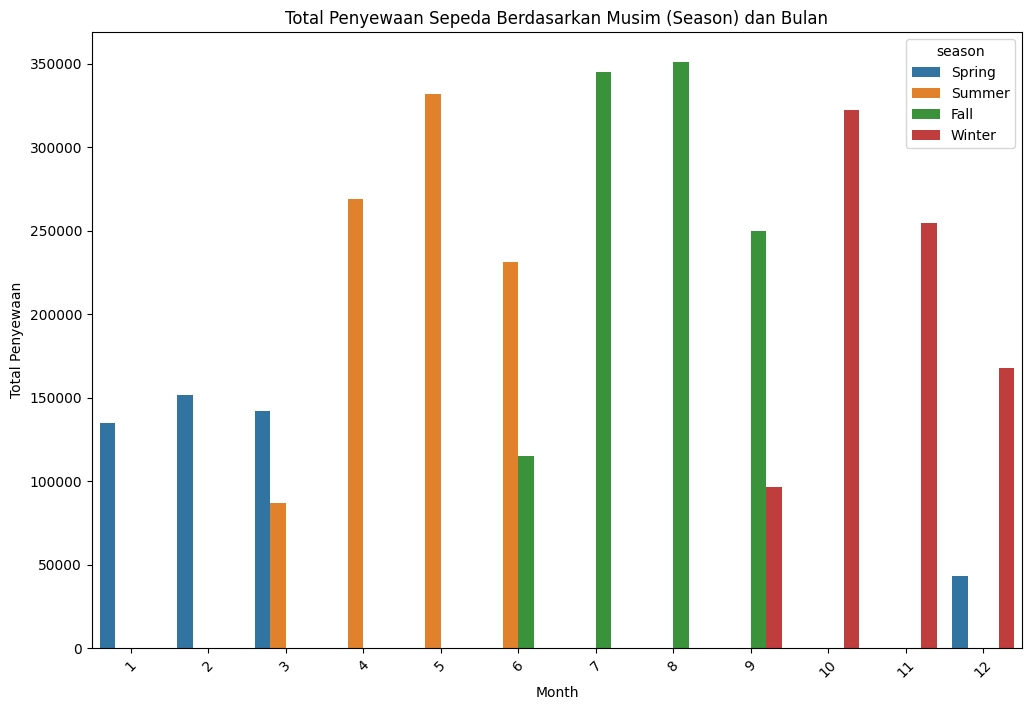

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=total_by_season_mnth, x='mnth', y='cnt_day', hue='season')

plt.title('Total Penyewaan Sepeda Berdasarkan Musim (Season) dan Bulan')
plt.xlabel('Month')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

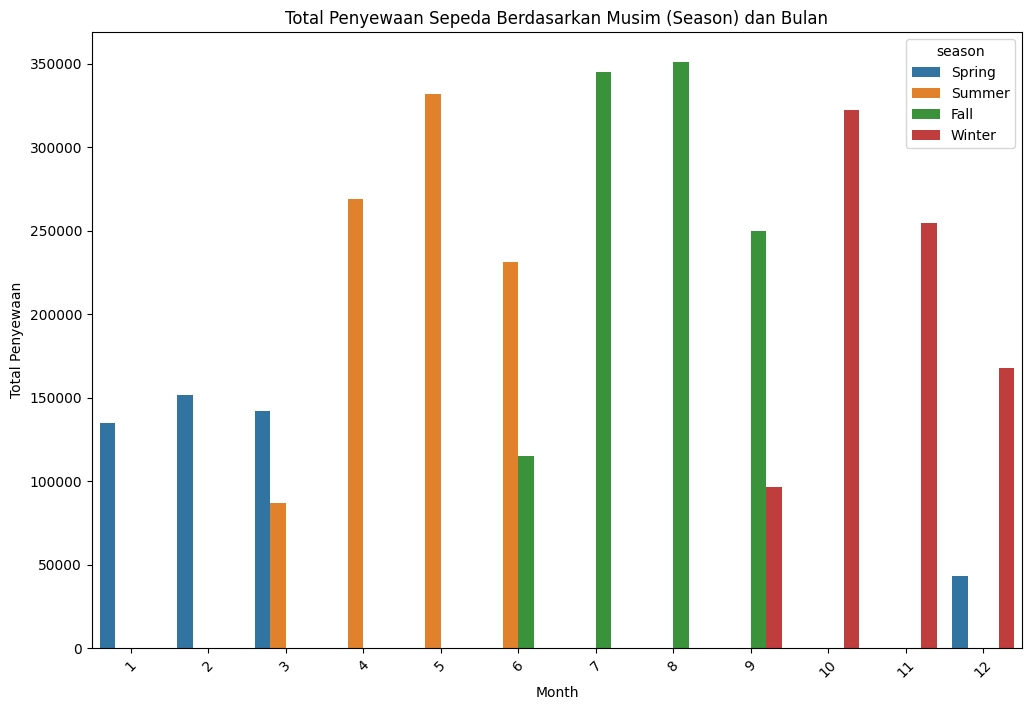

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=total_by_season_mnth, x='mnth', y='cnt_hour', hue='season')

plt.title('Total Penyewaan Sepeda Berdasarkan Musim (Season) dan Bulan')
plt.xlabel('Month')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)

plt.show()


Insight :
- data yang tersebar dapat dikatakan valid dan baik karena sudah memenuhi penyebaran musim pada setiap bulannya. Seperti musim panas (summer) yang terjadi pada bulan 3-6 (maret-juni), dsb.
- dari grafik dapat dilihat bahwa terdapat perbedaan signifikan mengenai banyaknya peminjaman/penyewaan sepeda yang terjadi pada setiap musim.
- dapat dilihat juga bahwa walaupun pada musim yang sama, tetap ada perbedaan banyak peminjaman sepeda pada masing-masing bulan.

# tren peminjaman/penyewaan sepeda dalam berbagai musim pada rentang tahun 2011-2012

Gabungkan kolom yr dan season untuk menyatukan data penyewaan sepede setiap musim pada rentang tahun 2011-2012

In [ ]:
total_by_season_year = df_combined.groupby(['yr', 'season']).agg({
    'cnt_day': 'sum',
    'cnt_hour': 'sum'
}).reset_index()

total_by_season_year['yr'] = total_by_season_year['yr'].replace({0: 2011, 1:2012})

print(total_by_season_year)


     yr  season  cnt_day  cnt_hour
0  2011    Fall   419650    419650
1  2011  Spring   150000    150000
2  2011  Summer   347316    347316
3  2011  Winter   326137    326137
4  2012    Fall   641479    641479
5  2012  Spring   321348    321348
6  2012  Summer   571273    571273
7  2012  Winter   515476    515476


Visualisasikan data penyewa sepeda dalam rentang tahun 2011-2012

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


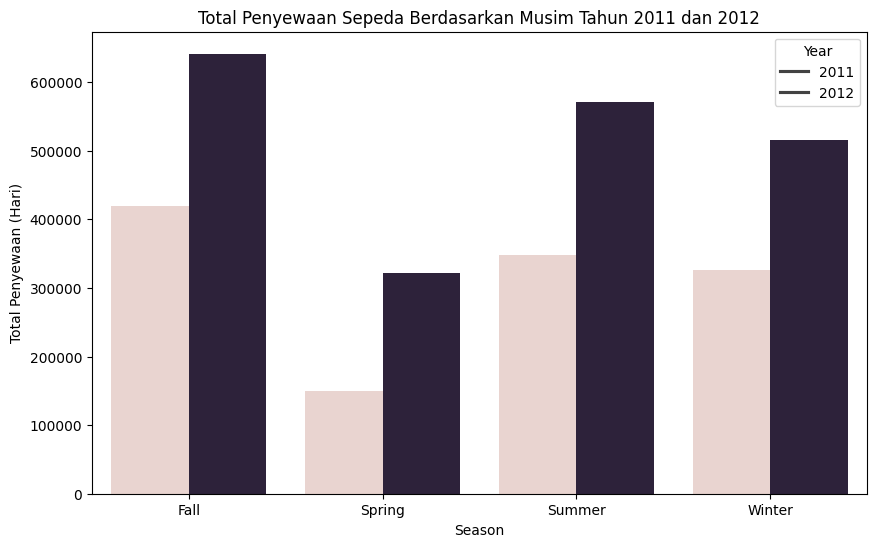

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_season_year, x='season', y='cnt_day', hue='yr')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim Tahun 2011 dan 2012')
plt.xlabel('Season')
plt.ylabel('Total Penyewaan (Hari)')
plt.legend(title='Year', loc='upper right', labels=['2011', '2012'])
plt.show()


**Insight:**
- pada tahun 2011 dan 2012 terdapat perbedaan tren penyewaan sepeda di tiap musimnya.
- tren penyewaan/peminjaman sepeda terus meningkat tiap tahunnya
- penyewaan sepeda dari musim gugur ke musim semi cenderung turun
- dari musim semi ke musim dingin terdapat kenaikan penyewa sepeda
- tren penyewaan sepeda paling tinggi terdapat pada musim gugur di tahun 2012


### Pertanyaan 2:

apa pengaruh holiday pada banyaknya penyewa sepeda?

Tampikan kembali data yang sudah digabungkan

In [ ]:
df_combined.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_day,registered_day,cnt_day,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,82,1518,1600


Gabungkan kolom holiday dan tahun untuk mengetahui tren

In [ ]:
df_combined['day_info'] = df_combined.apply(lambda row: f"{'Holiday' if row['holiday'] == 1 else 'Non-Holiday'} | {row['weekday']} | {'Working Day' if row['workingday'] == 1 else 'Non-Working Day'}", axis=1)

holiday_grouped = df_combined.groupby(['holiday', 'weekday', 'workingday']).agg({
    'cnt_day': 'sum',
    'cnt_hour': 'sum',
}).reset_index()

holiday_grouped['holiday_label'] = holiday_grouped['holiday'].replace({0: 'Non-Holiday', 1: 'Holiday'})
print(holiday_grouped)

    holiday    weekday  workingday  cnt_day  cnt_hour holiday_label
0         0     Friday           1   481296    481296   Non-Holiday
1         0     Monday           1   395898    395898   Non-Holiday
2         0   Saturday           0   477807    477807   Non-Holiday
3         0     Sunday           0   444027    444027   Non-Holiday
4         0   Thursday           1   481475    481475   Non-Holiday
5         0    Tuesday           1   468096    468096   Non-Holiday
6         0  Wednesday           1   465645    465645   Non-Holiday
7         1     Friday           0     6494      6494       Holiday
8         1     Monday           0    59605     59605       Holiday
9         1   Thursday           0     3920      3920       Holiday
10        1    Tuesday           0     1013      1013       Holiday
11        1  Wednesday           0     7403      7403       Holiday


In [ ]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

holiday_grouped['weekday'] = pd.Categorical(holiday_grouped['weekday'], categories=weekday_order, ordered=True)
holiday_grouped = holiday_grouped.sort_values('weekday').reset_index(drop=True)

print(holiday_grouped)


    holiday    weekday  workingday  cnt_day  cnt_hour holiday_label
0         0     Sunday           0   444027    444027   Non-Holiday
1         0     Monday           1   395898    395898   Non-Holiday
2         1     Monday           0    59605     59605       Holiday
3         0    Tuesday           1   468096    468096   Non-Holiday
4         1    Tuesday           0     1013      1013       Holiday
5         0  Wednesday           1   465645    465645   Non-Holiday
6         1  Wednesday           0     7403      7403       Holiday
7         0   Thursday           1   481475    481475   Non-Holiday
8         1   Thursday           0     3920      3920       Holiday
9         0     Friday           1   481296    481296   Non-Holiday
10        1     Friday           0     6494      6494       Holiday
11        0   Saturday           0   477807    477807   Non-Holiday


Ganti value kolom holiday dan year dari yang awalnya angka menjadi nama. Hal ini dilakukan agar mudah dalam membaca hasil analisa

Visualisasikan hasil dari data tersebut

<ipython-input-293-16afdb35bda8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=holiday_grouped, x='weekday', y='cnt_day', hue='holiday_label', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


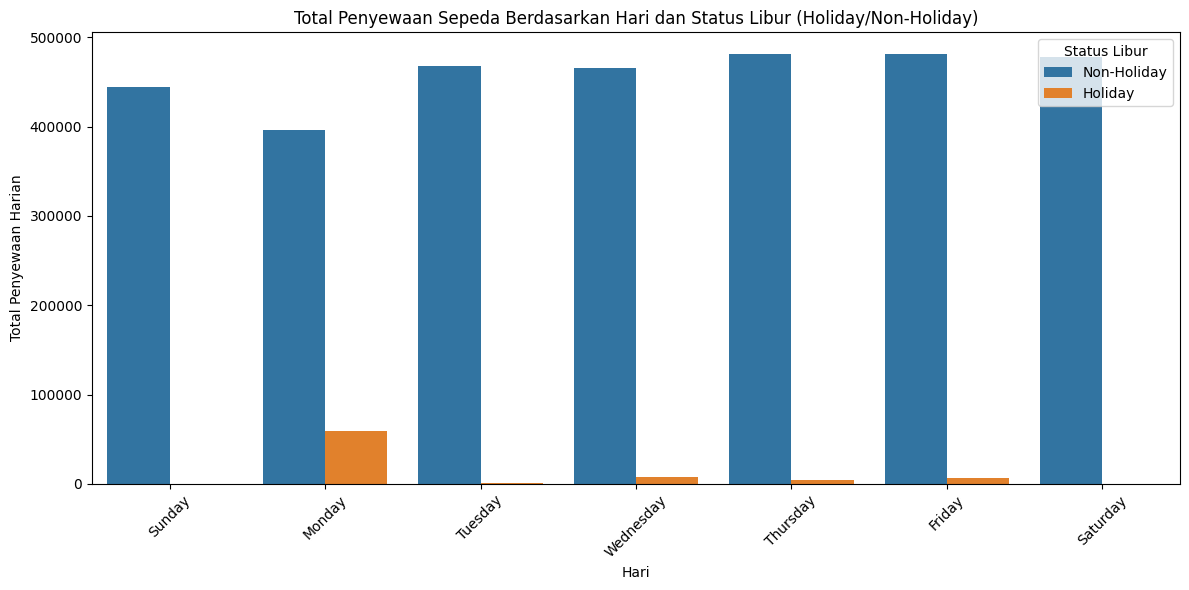

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(data=holiday_grouped, x='weekday', y='cnt_day', hue='holiday_label', ci=None)

plt.title('Total Penyewaan Sepeda Berdasarkan Hari dan Status Libur (Holiday/Non-Holiday)')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan Harian')
plt.xticks(rotation=45)  # Memutar label pada sumbu x

plt.legend(title='Status Libur')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


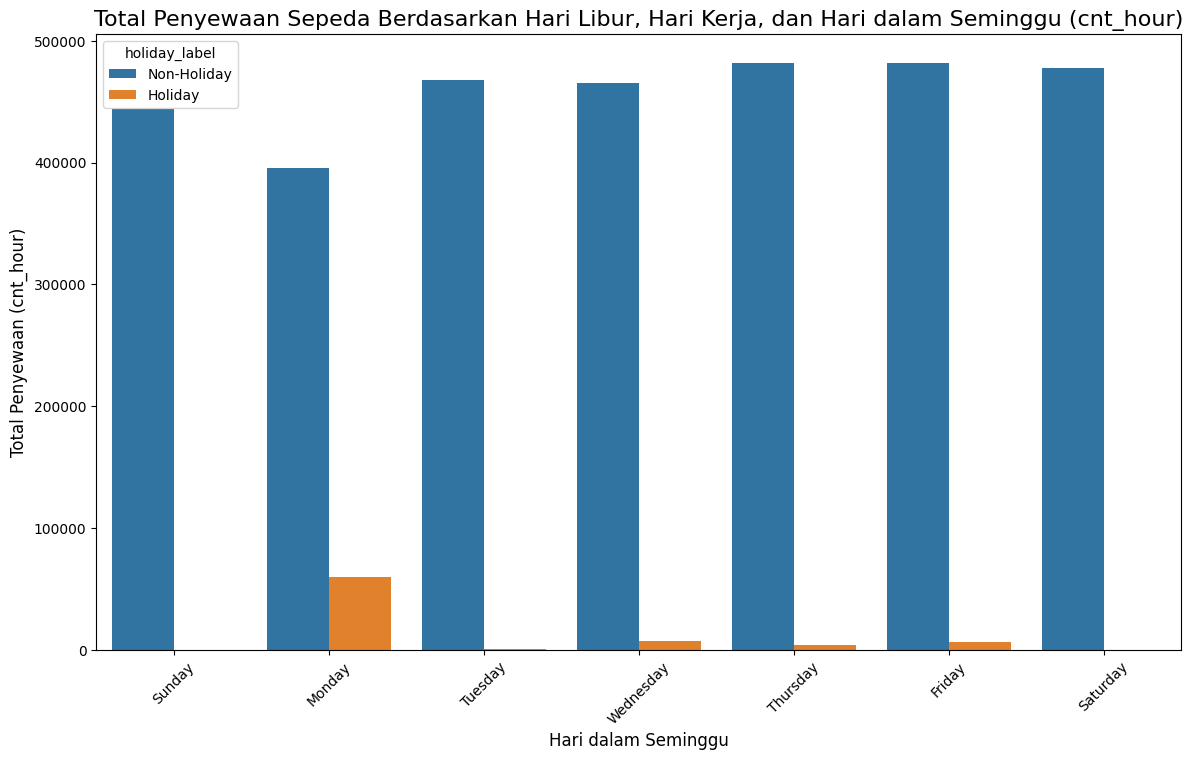

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=holiday_grouped, x='weekday', y='cnt_hour', hue='holiday_label')

plt.title('Total Penyewaan Sepeda Berdasarkan Hari Libur, Hari Kerja, dan Hari dalam Seminggu (cnt_hour)', fontsize=16)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Total Penyewaan (cnt_hour)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

#Insight
- Grafik pertama menunjukkan total penyewaan sepeda harian (cnt_day), sementara grafik kedua menunjukkan total penyewaan sepeda per jam (cnt_hour).
- hue='holiday_label' membedakan penyewaan berdasarkan hari libur dan non-hari libur.
- terdapat perbedaan signifikan antara penyewaan sepeda pada holiday dan non holiday
- tren penyewaan sepeda paling banyak terdapar pada hari biasa (non-holiday), lebih spesifiknya pada hari kamis, jum'at, dan sabtu.


## Analisis Lanjutan



Analisis lanjutan ini dilakukan dengan mengambil kolom yang relevan untuk clustering, yaitu jumlah penyewaan per bulan dan total jam penyewaan.

Tampilkan kembali data penyewaan sepeda

In [ ]:
df_hour = pd.read_csv("https://drive.google.com/uc?id=1L9OyIKdgGVPpThq55Z-54BFpOfurkNVu&export=download")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day = pd.read_csv("https://drive.google.com/uc?id=1LloLN-1f6CXvF4Qpp7Wgy4a6gO9KZtgu&export=download")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


terapkan metode elbow untuk menemukan jumlah cluster yang optimal

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['month'] = df_hour['dteday'].dt.month

monthly_rentals = df_hour.groupby('month')['cnt'].sum().reset_index()
total_hourly_rentals = df_hour.groupby('month')['cnt'].sum().reset_index(name='total_hour_rentals')
combined_data = pd.merge(monthly_rentals, total_hourly_rentals, on='month')
X = combined_data[['cnt', 'total_hour_rentals']]

   cluster      cnt
0        0  2042513
1        1   963881
2        2   286285


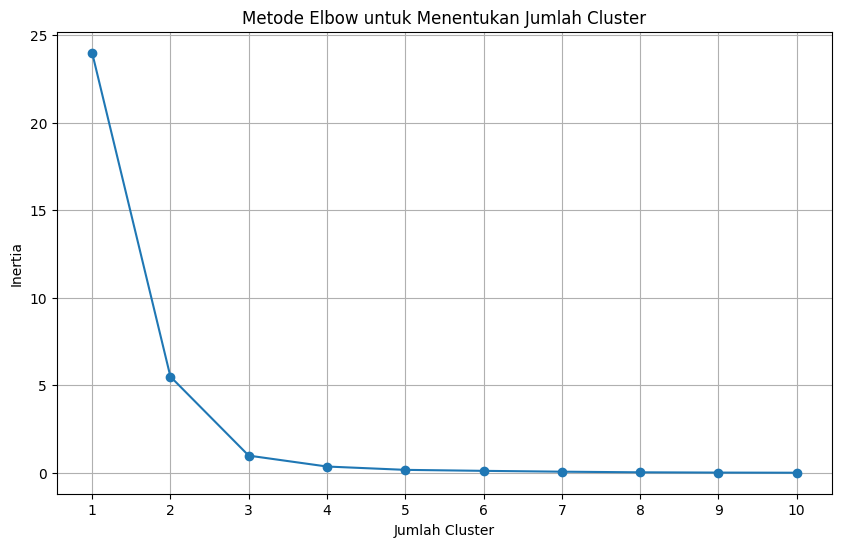

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
combined_data['cluster'] = kmeans.fit_predict(X_scaled)
cluster_rentals = combined_data.groupby('cluster')['cnt'].sum().reset_index()
print(cluster_rentals)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

Normalisasi Data menggunakan StandardScaler untuk menormalkan fitur sehingga memiliki mean 0 dan varians 1, yang penting dalam analisis K-Means.

visualisasi data menunjukkan pola yang jelas dalam tiga kelompok terpisah. Terdapat penurunan inertia yang signifikan dari 1 ke 3 cluster. Setelah 3 cluster, tambahan cluster tidak menunjukkan penurunan inertia yang berartiOleh karena itu, saya mengambil 3 cluster.

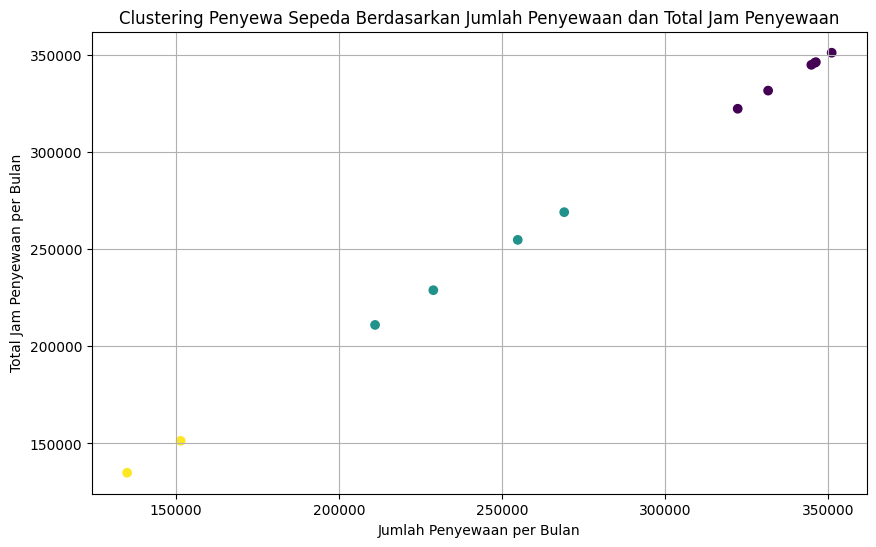

    month     cnt  total_hour_rentals  cluster
0       1  134933              134933        2
1       2  151352              151352        2
2       3  228920              228920        1
3       4  269094              269094        1
4       5  331686              331686        0
5       6  346342              346342        0
6       7  344948              344948        0
7       8  351194              351194        0
8       9  345991              345991        0
9      10  322352              322352        0
10     11  254831              254831        1
11     12  211036              211036        1


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['cnt'], combined_data['total_hour_rentals'], c=combined_data['cluster'], cmap='viridis', marker='o')
plt.title('Clustering Penyewa Sepeda Berdasarkan Jumlah Penyewaan dan Total Jam Penyewaan')
plt.xlabel('Jumlah Penyewaan per Bulan')
plt.ylabel('Total Jam Penyewaan per Bulan')
plt.grid()
plt.show()

print(combined_data)

In [ ]:
!conda activate main-ds
!pip install streamlit babel

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


## Conclusion Pertanyaan 1

Berdasarkan analisis data penyewaan sepeda untuk tahun 2011 dan 2012, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam tren penyewaan sepeda di tiap musimnya.

Secara keseluruhan, analisis ini menegaskan bahwa terdapat perbedaan yang jelas dalam tren penyewaan sepeda di tiap musim. Meskipun terjadi peningkatan secara umum dalam jumlah penyewa dari tahun ke tahun, perilaku penyewaan sangat dipengaruhi oleh faktor musiman. Pengelola layanan penyewaan sepeda dapat memanfaatkan temuan ini untuk merencanakan strategi pemasaran dan promosi yang lebih efektif berdasarkan pola penyewaan yang teridentifikasi, serta mempertimbangkan untuk meningkatkan layanan di musim-musim yang kurang diminati.

## Conclusion Pertanyaan 2

Berdasarkan analisis yang dilakukan terhadap data penyewaan sepeda harian dan per jam, serta visualisasi yang dihasilkan, dapat disimpulkan sebagai berikut
- Pengaruh Hari Libur Terhadap Penyewaan
Hasil analisis menunjukkan bahwa terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara kedua kategori ini. Pada umumnya, penyewaan sepeda cenderung lebih tinggi pada hari-hari biasa (non-holiday) dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh lebih sedikitnya aktivitas di luar rumah pada hari libur, atau pergeseran preferensi pengguna untuk bersepeda pada hari-hari kerja.

- Tren penyewaan
Tren penyewaan sepeda paling banyak terjadi pada hari biasa, khususnya pada hari Kamis, Jumat, dan Sabtu. Ini menunjukkan bahwa pengguna sepeda lebih cenderung untuk menyewa sepeda menjelang akhir pekan, ketika aktivitas sosial dan rekreasi meningkat. Peningkatan penyewaan pada hari-hari tersebut dapat dihubungkan dengan kebutuhan untuk melakukan perjalanan ke tempat-tempat wisata, acara komunitas, atau kegiatan luar ruang lainnya.

hasil analisis ini mengkonfirmasi bahwa terdapat perbedaan tren penyewaan sepeda yang signifikan di tiap musimnya, terutama antara hari libur dan non-hari libur. Hal ini dapat menjadi insight bagi penyedia layanan penyewaan sepeda untuk bisa mendapatkan operasional yang lebih efektif dengan mempertimbangkan hari yang cenderung memiliki permintaan tinggi

NameError: name 'all_df' is not defined